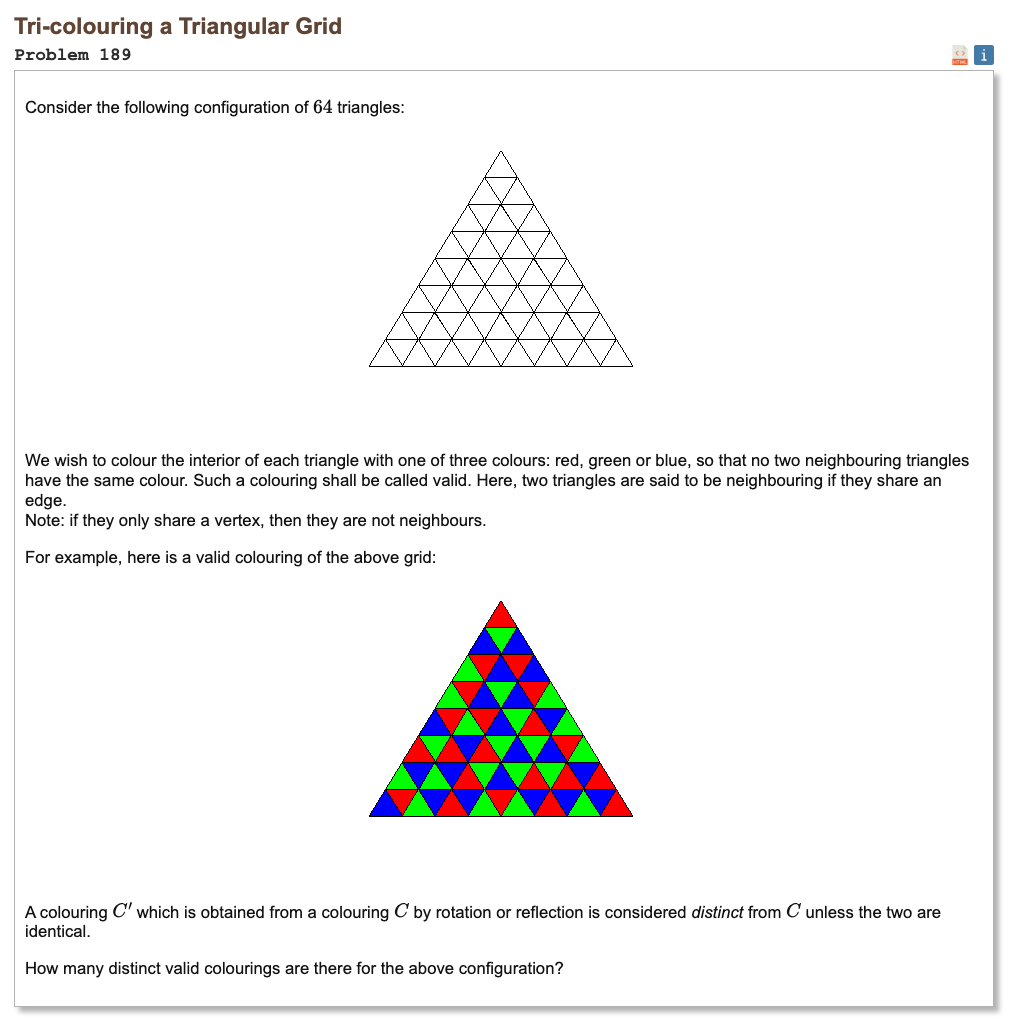

## Initial approach

* we build the big side 8 triangle from smaller triangles of side n
* for each size n we store a dictionary whose key is the colour pattern of the bottom row and whose value is how many valid colourings give that bottom row
* to expand from size n−1 to size n we loop over all possible colour patterns of the shared row between the old triangle and the new layer
* for each shared row we add up counts of all size n−1 triangles whose top row is compatible with it, meaning no position has the same colour in both rows
* then we generate all possible new bottom rows of length n that are valid with that shared row and also avoid equal colours between neighbours along the row
* we add the accumulated count to every such bottom row pattern, which builds the dictionary for size n
* after computing the dictionary for n = 8 we sum all its values and multiply by 3 because in the recursion we effectively fixed the top corner colour
* use itertools.product to iterate over all candidate shared rows in a clean way

In [1]:
from itertools import product

def is_match_row(a, b):
    return all(x != y for x, y in zip(a, b))

def accumulate_matches(bottom, prev_dict):
    total = 0
    for top, count in prev_dict.items():
        if is_match_row(top, bottom):
            total += count
    return total

def generate_next_side(t):
    n = len(t)
    colors = (1, 2, 3)

    def helper(k):
        if k == n:
            for c in colors:
                if c != t[n - 1]:
                    yield (c,)
        else:
            for suffix in helper(k + 1):
                if k == 0:
                    for c in colors:
                        if c != t[0]:
                            yield (c,) + suffix
                else:
                    for c in colors:
                        if c != t[k - 1] and c != t[k]:
                            yield (c,) + suffix

    yield from helper(0)

def triangle_side(n):
    if n == 1:
        return {(1,): 1}
    prev = triangle_side(n - 1)
    current = {}
    for t in product((1, 2, 3), repeat=n - 1):
        s = accumulate_matches(t, prev)
        if s == 0:
            continue
        for e in generate_next_side(t):
            current[e] = current.get(e, 0) + s
    return current

In [2]:
%%time

N = 8
data = triangle_side(N)
result = sum(data.values()) * 3
print("Result:", result)

Result: 10834893628237824
CPU times: user 2.53 s, sys: 7.92 ms, total: 2.54 s
Wall time: 2.54 s
